# Cat 1

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
from astropy.table import Table
t = Table.read('Data/cat3.vot', format='votable')

#print(t)
print("Finished reading Table. Read ",len(t['__Gmag_'])," sources")

WARNING

Finished reading Table. Read  75637  sources


: W49: Data/cat3.vot:59:61: W49: Empty cell illegal for integer fields. [astropy.io.votable.converters]


In [5]:
print("The astropy reader loads the data into the following variable names:")
print(t.colnames)

The astropy reader loads the data into the following variable names:
['d_arcsec', '_RAJ2000', '_DEJ2000', 'HIP', 'TYC2', 'Source', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__FG_', 'e__FG_', '__Gmag_', 'Var', '_RAJ2000_2', '_DEJ2000_2', 'TYC1', 'TYC2_2', 'TYC3', 'RAJ2000', 'DEJ2000', 'VTmag', 'BTmag', 'r_SpType', 'Dist', 'Teff', 'SpType']


#### Comments

Gmag and V-band should be correlated because they both indicate the magnitudes of the stars. 
There are outliers in the data, these are the points that are not in the diagonal line across the plot that
indicates a positive correlation between Gmag and V-band. 

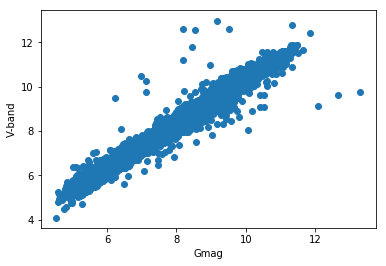

In [9]:
Gmag = t['__Gmag_']
Vband = t['VTmag']
plt.scatter(Gmag,Vband)
plt.xlabel('Gmag')
plt.ylabel('V-band')
plt.show()

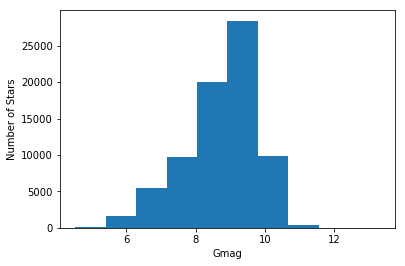

In [10]:
#Histogram of G band magnitudes
plt.hist(Gmag)
plt.xlabel('Gmag')
plt.ylabel('Number of Stars')
plt.show()

#### Comments
Most stars seem to have G magnitudes that are around 8 or 9

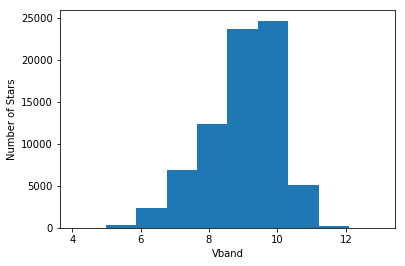

In [11]:
#Histogram of V band magnitudes
plt.hist(Vband)
plt.xlabel('Vband')
plt.ylabel('Number of Stars')
plt.show()

#### Comments

The histogram of V-band magnitudes is similar to the histogram of G magnitudes

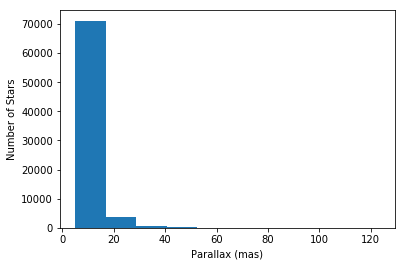

In [12]:
#Histogram of parallaxes
plx = t['Plx']
plt.hist(plx)
plt.xlabel('Parallax (mas)')
plt.ylabel('Number of Stars')
plt.show()

#### Comments

Most stars seem to have parallaxes that are smaller than 25 mas. The data was chosen so that the stars had parallaxes greater than 8 mas. 

There is another variable d_arcsec. What is d_arcsec?

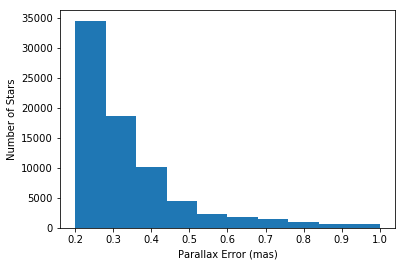

In [13]:
#Histogram of parallax errors
plx_err = t['e_Plx']
plt.hist(plx_err)
plt.xlabel('Parallax Error (mas)')
plt.ylabel('Number of Stars')
plt.show()

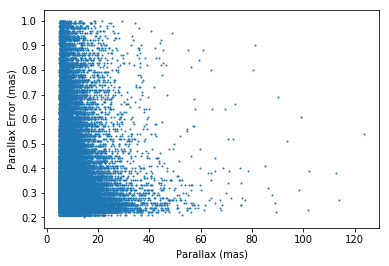

In [14]:
#Plot of parallax error vs. parallax
plt.scatter(plx,plx_err,s=1)
plt.xlabel('Parallax (mas)')
plt.ylabel('Parallax Error (mas)')
plt.show()

In [15]:
#calculate distances and store them in table column
d_data = np.zeros(len(plx))
for i in range(len(d_data)):
    d_data[i] = 1/(plx[i]/1000)
d = Table.Column(data=d_data, name='d')
t.add_column(d)


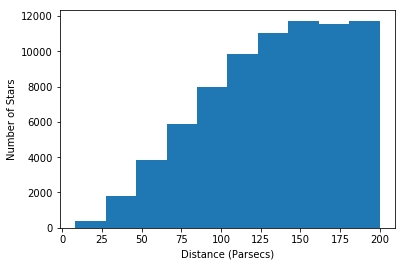

In [17]:
#Histogram of distances
plt.hist(d)
plt.xlabel('Distance (Parsecs)')
plt.ylabel('Number of Stars')
plt.show()

#### Comments

This histogram makes sense, since I limited the search to stars closer than 120 parsecs. There should be more stars that are further away from the earth, than closer, so the increase in number with distance also makes sense. 

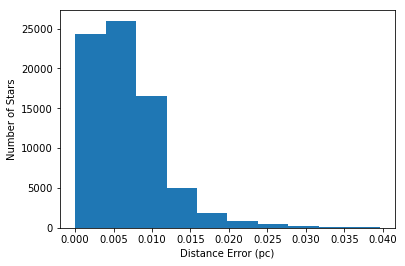

In [19]:
#Histogram of distance error 
d_err_data = np.zeros(len(plx))
for i in range(len(d_err_data)):
    d_err_data[i] = plx_err[i]/math.pow(plx[i],2)
d_err = Table.Column(data=d_err_data, name='d_err')
#t.add_column(d_err)

plt.hist(d_err)
plt.xlabel('Distance Error (pc)')
plt.ylabel('Number of Stars')
plt.show()

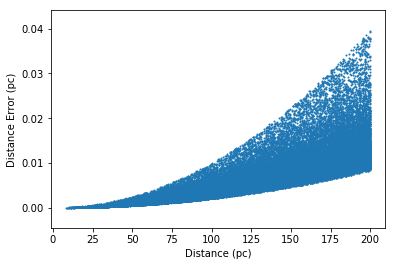

In [20]:
#Plot of distance error vs. distance
plt.scatter(d,d_err,s=1)
plt.xlabel('Distance (pc)')
plt.ylabel('Distance Error (pc)')
plt.show()

In [21]:
#Calculate absolute magnitudes and store them in table column
Abs_mag_data = np.zeros(len(d))
for i in range(len(Abs_mag_data)):
    #Gmag is taken as apparent magnitude
    Abs_mag_data[i] = Gmag[i] - 5*math.log10(d[i]/10)
Abs_mag = Table.Column(data=Abs_mag_data, name='Abs_mag')
t.add_column(Abs_mag)

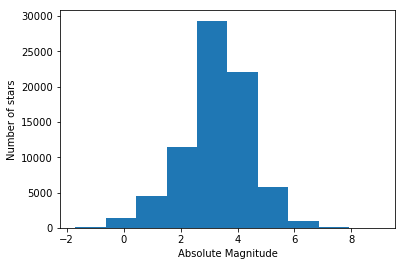

In [22]:
#Histogram of absolute magnitudes
plt.hist(Abs_mag)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Number of stars')
plt.show()

#### Comments

Most star seem to have absolute magnitudes that are around 4. In the G band most stars had magnitudes at around 8 or 9. Since most of the absolute magnitudes are brighter than the apparent magnitudes, that means most stars are further than 10 parsecs, which agrees with the distribution of distances determined. There are few stars brighter than 0 mag because massive, bright stars are rare. There are few stars fainter than 7 mag because the detector is limited in detecting faint stars.  

The mean temperature is 6267.11834155 K
The dispersion is 1166.45237432 K


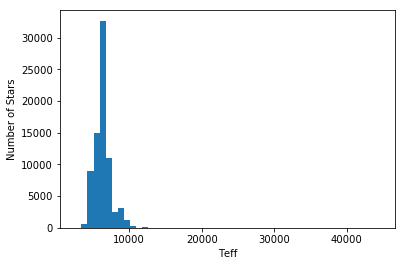

In [23]:
Teff = t['Teff']
plt.hist(Teff,50)
plt.xlabel('Teff')
plt.ylabel('Number of Stars')
print('The mean temperature is ' +str(Teff.mean()) + ' K')
print('The dispersion is ' + str(Teff.std()) + ' K')
plt.show()

#### Comments

The mean of temperatures makes sense since that is the approximate temperature for  a G or F star. 

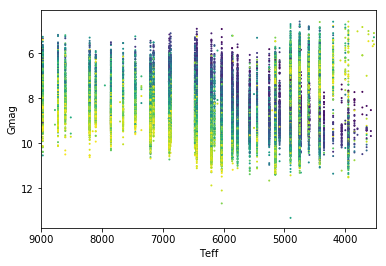

In [24]:
#H-R diagram (with apparent magnitude)
plt.xlim(3500,9000)
plt.scatter(Teff, Gmag,c=d,s=1.0)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('Teff')
plt.ylabel('Gmag')
plt.show()

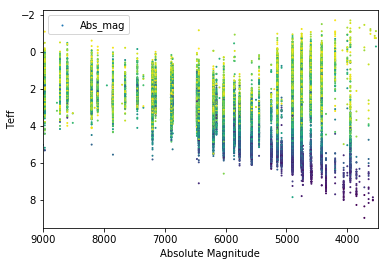

In [25]:
#H-R diagram (with absolute magnitude)
plt.xlim(3500,9000)
plt.scatter(Teff,Abs_mag,c=d,s=1.0)
plt.xlabel('Absolute Magnitude')
plt.ylabel('Teff')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.legend()
plt.show()